In [1]:
from whisperweranalysis.structure import HvdSet
from whisperweranalysis.groundtruth import hvd_sentences

/home/shivam/Projects/analysis-scripts/WhisperWERAnalysis/.venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
hvd_set1 = HvdSet(1, hvd_sentences)

In [4]:
hvd_set1.compute_wer('/home/shivam/Projects/analysis-scripts/WhisperWERAnalysis/whisperweranalysis/transcription')

In [5]:
from whisperweranalysis.structure import MultipleSets
hvd_sets = MultipleSets('/home/shivam/Projects/analysis-scripts/WhisperWERAnalysis/whisperweranalysis/transcription')

In [12]:
top_10 = hvd_sets.get_top_n(10)

In [28]:
from whisperweranalysis.utilities import get_statistics_of_wer, get_all_values
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [43]:
top_10

[HvdSet(13, 121, 130),
 HvdSet(31, 301, 310),
 HvdSet(47, 461, 470),
 HvdSet(49, 481, 490),
 HvdSet(50, 491, 500),
 HvdSet(51, 501, 510),
 HvdSet(58, 571, 580),
 HvdSet(63, 621, 630),
 HvdSet(67, 661, 670),
 HvdSet(72, 711, 720)]

In [29]:
get_statistics_of_wer(hvd_sets)

({'NH2': 0.05739611108255389,
  'NeuralFHMM_NoDropout': 0.030771643227601866,
  'Tacotron2': 0.06360939798900696,
  'NeuralFHMM': 0.031270758821639384,
  'NeuralFHMM_NoSampling': 0.0221044557496172,
  'Glow': 0.11572721721339116},
 {'NH2': 0.03446396860764035,
  'NeuralFHMM_NoDropout': 0.022665125871859614,
  'Tacotron2': 0.03143415080361446,
  'NeuralFHMM': 0.026930398165634306,
  'NeuralFHMM_NoSampling': 0.018439383673575855,
  'Glow': 0.043827141384726334})

/home/shivam/Projects/analysis-scripts/WhisperWERAnalysis/.venv/lib/python3.8/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


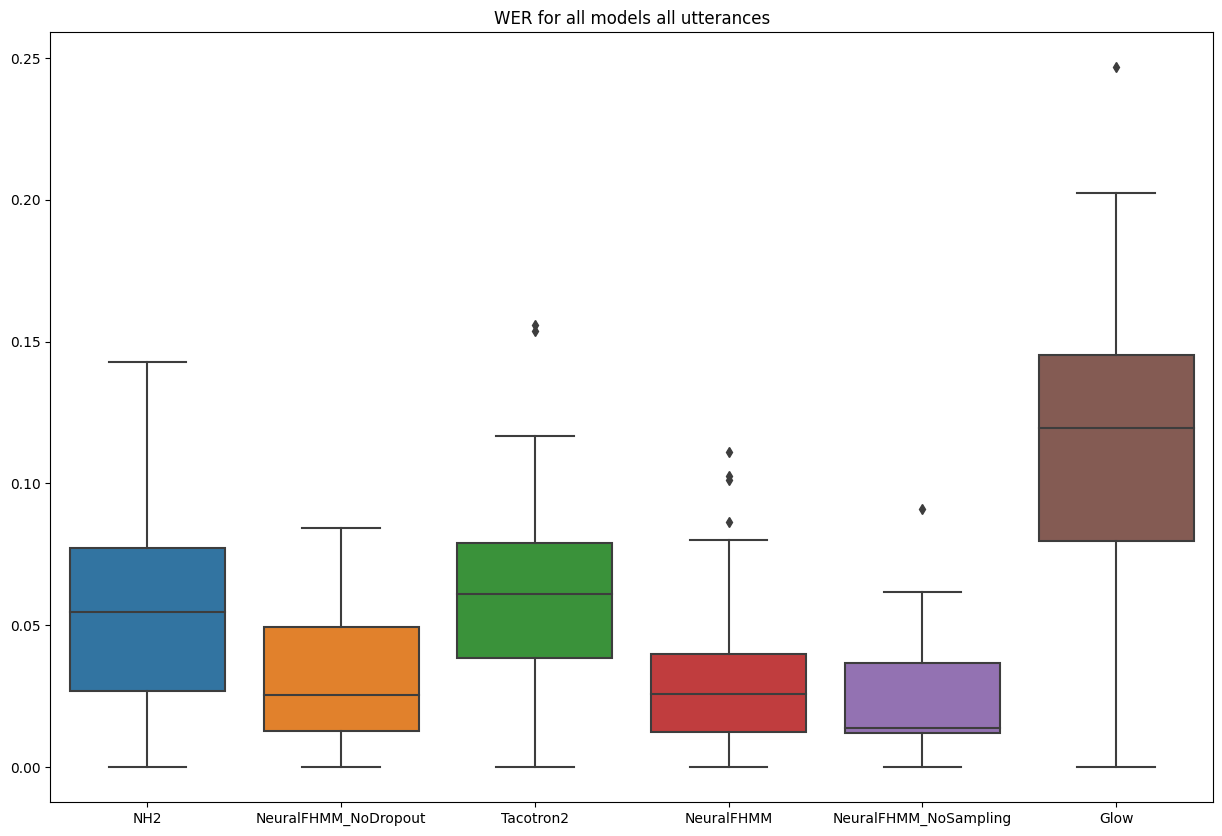

/home/shivam/Projects/analysis-scripts/WhisperWERAnalysis/.venv/lib/python3.8/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


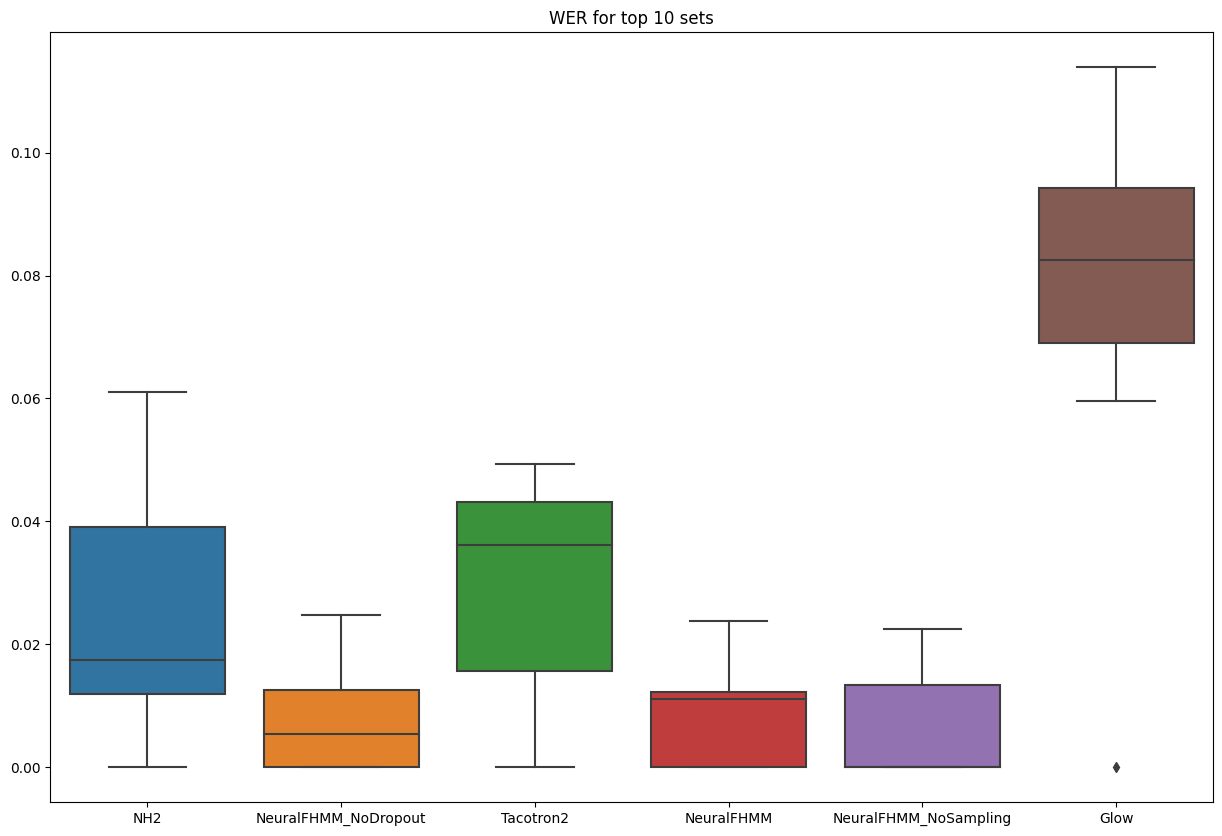

In [42]:
all_wer = get_all_values(hvd_sets)
df = pd.DataFrame.from_dict(all_wer)

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('WER for all models all utterances')
sns.boxplot(data=df, ax=ax)
plt.show()




top_10_wer = get_all_values(top_10)
df = pd.DataFrame.from_dict(top_10_wer)

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('WER for top 10 sets')
sns.boxplot(data=df, ax=ax)
plt.show()

In [22]:
get_statistics_of_wer(hvd_sets)

({'NH2': 0.05739611108255389,
  'NeuralFHMM_NoDropout': 0.030771643227601866,
  'Tacotron2': 0.06360939798900696,
  'NeuralFHMM': 0.031270758821639384,
  'NeuralFHMM_NoSampling': 0.0221044557496172,
  'Glow': 0.11572721721339116},
 {'NH2': 0.03446396860764035,
  'NeuralFHMM_NoDropout': 0.022665125871859614,
  'Tacotron2': 0.03143415080361446,
  'NeuralFHMM': 0.026930398165634306,
  'NeuralFHMM_NoSampling': 0.018439383673575855,
  'Glow': 0.043827141384726334})

In [13]:
{key: value[3] for key, value in top_10[2].transcriptions.items()}

{'NH2': 'He sent the figs, but kept the ripe cherries.',
 'NeuralFHMM_NoDropout': 'He sent the figs but kept the ripe cherries.',
 'Tacotron2': 'He sent the figs, but kept the ripe cherries.',
 'NeuralFHMM': 'He sent the figs, but kept the ripe cherries.',
 'NeuralFHMM_NoSampling': 'He sent the figs but kept the ripe cherries.',
 'Glow': 'He sent the fakes but kept the rot cherries.'}